In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import time

from scipy.sparse.linalg import svds as scipy_svd
from numpy.linalg import svd as numpy_svd
from sklearn.utils.extmath import randomized_svd as sklearn_svd

In [73]:
plt.rcParams.update({"font.size" : 15, "font.family" : "serif"})

 ###  Задача 1

In [56]:
n = 2000
A = np.random.normal(loc=0.0, scale=1.0, size=(n, n))
A

array([[-0.28824414, -0.72344481, -0.31466461, ...,  0.48469425,
        -0.48534312, -1.75019397],
       [ 0.97365819, -0.3006159 ,  0.23759037, ...,  1.7838543 ,
         0.98583849,  0.47303252],
       [ 0.97682293,  0.66719562,  0.34751901, ...,  1.08327426,
         1.34790485,  0.82349545],
       ...,
       [ 0.45672919, -0.83670329,  0.28055832, ..., -1.27079724,
         0.82394745,  0.08654333],
       [-0.87594766,  0.32259166, -1.46007173, ...,  0.58111975,
         0.75498419, -0.69455994],
       [-2.75542392, -0.99751411, -1.08212821, ...,  1.93992511,
        -0.38518655,  0.20831918]])

In [64]:
#np.linalg.svd
t_numpy = %timeit -o -q -n 2 -r 2 numpy_svd(A)
u, s, vh = numpy_svd(A)
u, s, vh = u[:,:2], s[:2], vh[:2,:]
A_svd = u @ np.diag(s) @ vh


#scipy.sparse.linalg.svds
t_scipy = %timeit -o -q -n 2 -r 2 scipy_svd(A)
u, s, vh = scipy_svd(A, k=2)
A_svds = u@np.diag(s)@vh

#sklearn.utils.extmath.randomized_svd
t_sklearn = %timeit -o -q -n 2 -r 2 sklearn_svd(A, n_components=2)
u, s, vh = sklearn_svd(A, n_components=2)
A_rsvd = u@np.diag(s)@vh

/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [66]:
print("Error")
print("_____________________________________")
print("A_svd     : ", np.linalg.norm(A_svd-A, ord="fro"))
print("A_svds    : ", np.linalg.norm(A_svds-A, ord="fro"))
print("A_rsvd    : ", np.linalg.norm(A_rsvd-A, ord="fro"))
print()
print("Time")
print("_____________________________________")
print("Time_svd  : ", t_numpy)
print("Time_svds : ", t_scipy)
print("Time_rsvd : ", t_sklearn)

Error
_____________________________________
A_svd     :  1995.4380988107664
A_svds    :  1995.4380988107664
A_rsvd    :  1995.6080648210457

Time
_____________________________________
Time_svd  :  2.94 s ± 46.8 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Time_svds :  563 ms ± 9.18 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Time_rsvd :  121 ms ± 6.46 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


__ВыводЫ:__

- рандомизированный svd работает быстрее всего, он экономит вычисления за счет приближенного ответа


- нормы фробениуса для всех вариантов получились очень большие; думаю, что это связано с тем, что матрицы случайные, в них нет каких-то закономерностей, которые часто встречаются в матрицах из реальных задач(для реальных матриц убывание обычно экспоненциальное)


- как видно из графика ниже, сингулярные значения убывают медленно, это не позволяет делать хорошие малоранговые приближения

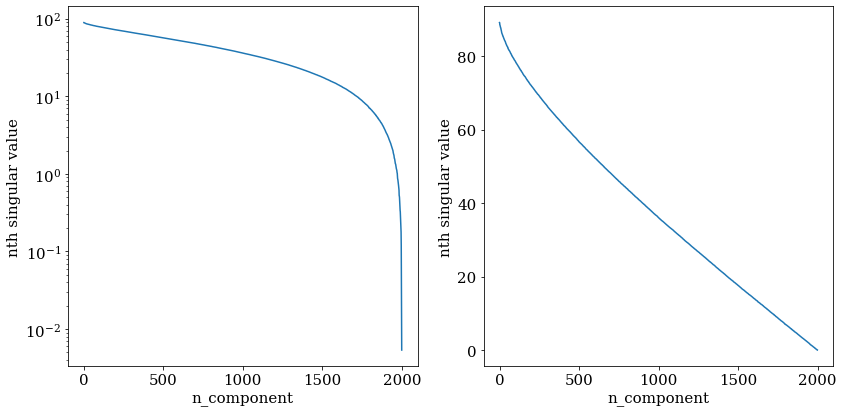

In [76]:
u, s, vh = numpy_svd(A)
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.semilogy(s)
plt.xlabel("n_component")
plt.ylabel("nth singular value")

plt.subplot(122)
plt.plot(s)
plt.xlabel("n_component")
plt.ylabel("nth singular value")

plt.tight_layout()

### Задача 2

- $(A^TA)^{-1}=(V\Sigma^TU^T U \Sigma V^T)^{-1}=(V\Sigma^T \Sigma V^T)^{-1}=(\Sigma^T \Sigma V V^T)^{-1} = (\Sigma^T \Sigma )^{-1}=\Sigma^{-2}$


- $(A^TA)^{-1}A^T = \Sigma^{-2}V\Sigma U^T$


-  $A(A^TA)^{-1} = U\Sigma V^T\Sigma^{-2}$


- $A(A^TA)^{-1}A^T = U\Sigma V^T\Sigma^{-2}V\Sigma U^T = \Sigma^{-2}U\Sigma V^TV\Sigma U^T = \Sigma^{-2}\Sigma^2=I$

### Задача 3

In [349]:
#Считаю, что собственные значения и векторы разрешается искать не ручками, а в питончике
A = np.array([[-2, 11], [-10, 5]])

#1) Считаем правые сингулярные векторы V
res = np.linalg.eig(A.T@A)
v2, v1 = res[1].T
s2, s1 = res[0]**0.5
v = np.array([v1, v2]).T

#2) Считаем левые сингулярные векторы U
u1, u2 = v1@A.T/s1, v2@A.T/s2
u = np.array([u1, u2]).T

print(v1, v2, s1, s2)
print(u1, u2)

[ 0.6 -0.8] [-0.8 -0.6] 14.142135623730951 7.0710678118654755
[-0.70710678 -0.70710678] [-0.70710678  0.70710678]


In [362]:
# Меньше минусов
v1, v2 = v1, -v2
u1, u2 = u1, -u2

print("Right singular vedctors : ", v1, v2)
print()
print("Left singular vectors  : ", u1, u2)
print()
print("Singular values        : ", s1, s2)

Right singular vedctors :  [ 0.6 -0.8] [-0.8 -0.6]

Left singular vectors  :  [-0.70710678 -0.70710678] [-0.70710678  0.70710678]

Singular values        :  14.142135623730951 7.0710678118654755


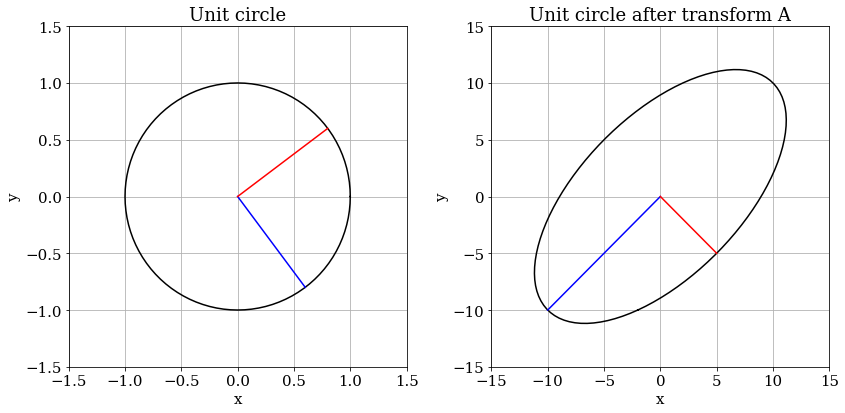

In [361]:
# Рисовашки
t = np.arange(0, 2.01*np.pi, 2*np.pi/100)
n = len(t)
x = np.cos(t)
y = np.sin(t)

x_new = np.zeros(n)
y_new = np.zeros(n)

for i in range(n):
    x_new[i] = A[0,0]*x[i]+A[0,1]*y[i]
    y_new[i] = A[1,0]*x[i]+A[1,1]*y[i]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(x, y, color="black")
plt.plot([0,v1[0]] ,[0,v1[1]], color="blue")
plt.plot([0, v2[0]], [0, v2[1]], color="red")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unit circle")
plt.grid()


plt.subplot(122)
plt.plot(x_new, y_new, color="black")
plt.plot([0,s1*u1[0]] ,[0,s1*u1[1]], color="blue")
plt.plot([0, s2 *u2[0]], [0, s2*u2[1]], color="red")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unit circle after transform A")
plt.grid()

plt.tight_layout()

$||A||_2 = \sigma_1, \; ||A||_F = \sqrt{\sigma_1^2 + \sigma_2 ^2}$

In [360]:
# Нормы
print("A2 = ", s1)
print("AF = ", (s1**2+s2**2)**0.5)

A2 =  14.142135623730951
AF =  15.811388300841898


$A^{-1} = V\Sigma^{-1}U^T$, $\Sigma^{-1} = \begin{pmatrix}
\frac{1}{\sigma_1} & 0\\
0 & \frac{1}{\sigma_2}\\
\end{pmatrix}$

In [359]:
# Обратная матрица через SVD
v = np.array([v1, v2]).T
u = np.array([u1, u2]).T
s = np.array([[s1, 0], [0, s2]])
sinv = np.array([[1/s1, 0], [0, 1/s2]])
Ainv = v@sinv@u.T

print(Ainv@A)
print(A@Ainv)

[[1.00000000e+00 3.74700271e-16]
 [7.63278329e-17 1.00000000e+00]]
[[ 1.00000000e+00 -1.56125113e-16]
 [-1.66533454e-16  1.00000000e+00]]


In [358]:
# Собственные значения
np.linalg.eig(A)

(array([1.5+9.88685997j, 1.5-9.88685997j]),
 array([[0.72374686+0.j        , 0.72374686-0.j        ],
        [0.23028309+0.65050763j, 0.23028309-0.65050763j]]))

### Задача 4

1) $A_{ij} \simeq h_i \eta_j \Leftrightarrow A=h \eta^T$, по теореме о ранге произведения 
$rang(h\eta^T) \leq rang(h) + rang(\eta^T) - 1 = 1$, т.е. аппроксимация имеет ранг 1

2) По теореме Эккарта-Янга-Мирского лучшим приближением матрицы A ранга r является её обрезанное сингулярное разложение по первым r сингулярным числам, причем $||A-A_r||_F=\sqrt{\sum_{i=r+1}^n\sigma_i^2}$

3) SVD-разложение даёт $A = U\Sigma V^T$, где $U=(u_1 \;u_2\;...), \Sigma = Diag(\sigma_1, \sigma_2,...), V=(v_1 \;v_2\;...)$, $u_i, v_j$ - векторы-столбцы, причем $\sigma_i\geq 0$

$A_1 = \begin{pmatrix}
u_1 \\
\end{pmatrix}
\begin{pmatrix}
\sigma_1\\
\end{pmatrix}
\begin{pmatrix}
v_1^T\\
\end{pmatrix} = \sigma_1 u_1 v_1^T$

Тогда $h=\sqrt{\sigma_1}u_1, \; \eta = \sqrt{\sigma_1}v_1$(коэффициенты можно и по-другому выбрать, но мне нравится так)

4) $\delta_{err} = \frac{\sqrt{\sum(A_{ij}-h_i \eta_j)^2}}{\sqrt{\sum A_{ij}^2}} = \frac{||A-h\eta^T||_F}{||A||_F} = \frac{\sqrt{\sum_{i=2}^n \sigma_i^2}}{\sqrt{\sum_{i=1}^n \sigma_i^2}} = \sqrt{1-\frac{\sigma_1^2}{\sum_{i=1}^n \sigma_i^2}}$(доля необъясненной дисперсии фактически)

5) $A_{ij} = \sum_{\alpha=1}^K h_{\alpha i} \eta_{j \alpha} \Leftrightarrow A = \sum_{i=1}^{rang(A)}\sigma_i u_i v_i^T$, т.е. $K=rang(A)$

In [327]:
A = np.load("A.npy")

u, s, vh = np.linalg.svd(A)
A_svd = u[:,:1] @ np.diag(s[:1]) @ vh[:1,:]

print("delta_err          : ", np.linalg.norm(A-A_svd, ord="fro")/np.linalg.norm(A, ord="fro"))
print("delta_err_formula  : ", (1- s[0]**2/np.sum(s**2))**0.5)

delta_err          :  0.7742251888975445
delta_err_formula  :  0.7742251888975445


[5.00299422e+01 4.99770106e+01 2.54470684e+01 2.45000000e+01
 1.11272856e-14 9.55930610e-15 8.62751654e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 3.65548473e-15
 3.20651151e-15 1.21059206e-15]


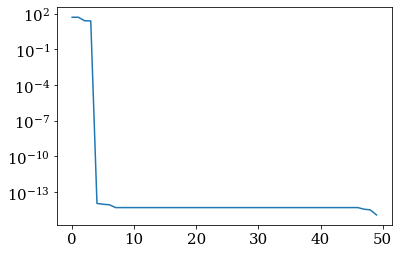

In [328]:
plt.semilogy(s)
print(s)

In [117]:
u, s, vh = np.linalg.svd(A)
A_svd = u[:,:4] @ np.diag(s[:4]) @ vh[:4,:]

print("delta_err : ", np.linalg.norm(A-A_svd, ord="fro")/np.linalg.norm(A, ord="fro"))

delta_err :  3.2502455784278293e-15


__Вывод:__

- По сингулярным числам видно, что ранг матрицы равен 4, ошибка такой аппроксимации это по сути ошибка вычислений


- Задачка забавная, я бы за неё больше баллов ставил

### Задача 5

In [91]:
digits = load_digits()
A = digits.data
y = digits.target

print(A.min())
print(A.max())
print(np.unique(A))

0.0
16.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


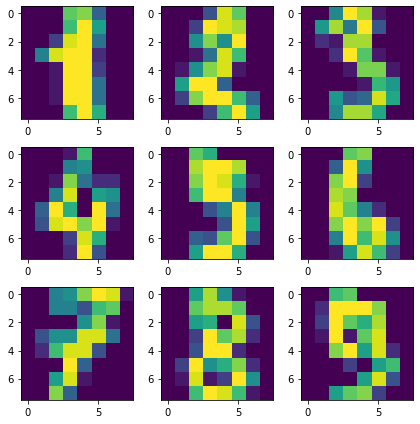

In [42]:
plt.figure(figsize=(6, 6))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(A[i].reshape(8, 8))
plt.tight_layout()

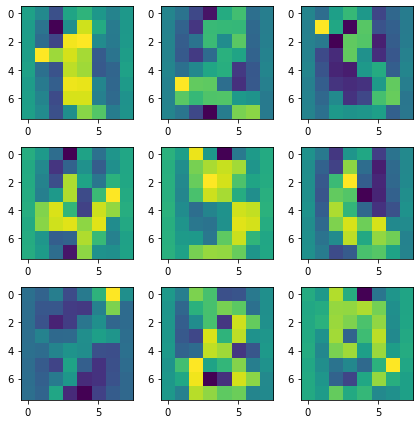

In [43]:
#Такой вариант нормализации работает так себе
#(вычет среднего+деление на стандартное отклонение)
ss=StandardScaler()
ss.fit(A)
A_transform = ss.transform(A)

plt.figure(figsize=(6, 6))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(A_transform[i].reshape(8, 8))
plt.tight_layout()

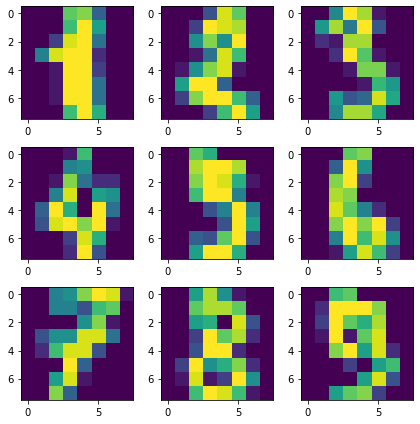

In [143]:
#min-max нормализация
#То что надо
A_transform = 2*(A/A.max()-0.5)

plt.figure(figsize=(6, 6))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(A_transform[i].reshape(8, 8))
plt.tight_layout()

In [159]:
u, s, vh = svd(A, full_matrices=False)
v = vh.T
print((u.shape, s.shape, v.shape))

n = 2
u, s, v = u[:,:n], s[:n], v[:,:n]

((1797, 64), (64,), (64, 64))


In [145]:
A_new = u @ np.diag(s) @ v.T
print(A_new.shape)
np.linalg.norm(A_new-A)

(1797, 64)


1332.574288788176

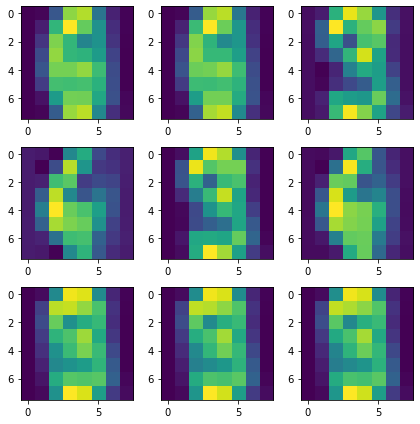

In [199]:
plt.figure(figsize=(6, 6))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(A_new[i].reshape(8, 8))
plt.tight_layout()

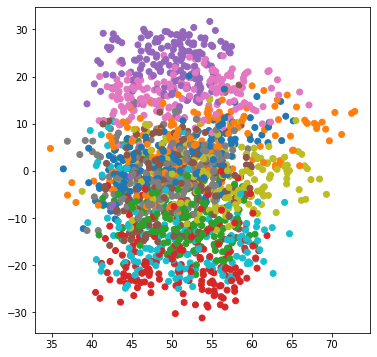

In [200]:
X = u@np.diag(s)

plt.figure(figsize=(6, 6))

plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10")

In [201]:
u, s, vh = svd(A, full_matrices=False)
v = vh.T

n = 64
u, s, v = u[:,:n], s[:n], v[:,:n]
X = u@np.diag(s)

X_embedded = TSNE(n_components=2).fit_transform(X)

/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '64 признака - максимум')

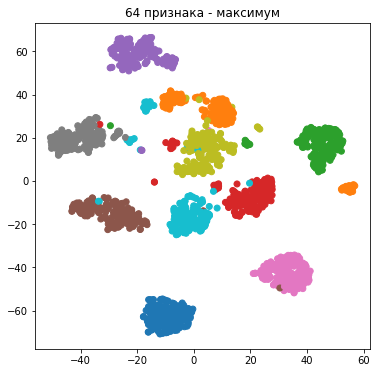

In [202]:
plt.figure(figsize=(6, 6))

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap="tab10")
plt.title("64 признака - максимум")

In [203]:
u, s, vh = svd(A, full_matrices=False)
v = vh.T

n = 8
u, s, v = u[:,:n], s[:n], v[:,:n]
X = u@np.diag(s)

X_embedded = TSNE(n_components=2).fit_transform(X)

/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '8 признаков')

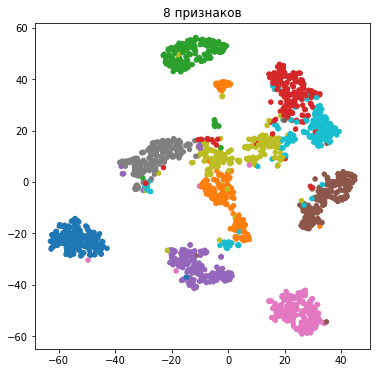

In [204]:
plt.figure(figsize=(6, 6))

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap="tab10", s=20)
plt.title("8 признаков")

__Вывод:__

- Разложение по 2 компонентам грубовато. Видно, что есть какие-то зачатки кластеризации, но компонент явно недостаточно


- Разложение по 8 компонентам даёт хороший результат. С помощью t-SNE можно "спроектировать" признаки в двумерное (латентное)пространство, построить кластеры


- SVD/PCA помогают снизить размерность задачи 